<a href="https://colab.research.google.com/github/pablOOO5/pablOOO5/blob/main/Scrapea_SEO_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrapea resultados SEO Local
---

- Resumen de los primeros resultados
- Gráficas de categoría principal y subcategorías GMB
- Mencionado en reseñas (según google) + Sustantivos, adjetivos, verbos... más usados
- Tabla con últimas publicaciones
- Atributos de servicio

** **Nota**: En algunas ocasiones google devuelve un html complemente diferente como si estuviera haciendo pruebas o para evitar scrapeos automáticos. En esos casos a menudo basta con esperar un rato y ejecutar de nuevo o hacer una copia del colab y ejecutarla (archivo guardar una copia en drive)

---

1. Cambia en el código por keyword que quieras usar (ej. keyword = "abogado madrid")
2. Pulsa el play
3. Espera a que el script acabe.
4. 👇️ Las gráficas y tablas aparecerán debajo del script 👇️

  
Un saludo desde Mallorca,

[Jose Gris](https://twitter.com/JoseGrisSEO) 😎

<br>

---

Si te son útiles mis colabs [invítame a un café](https://www.buymeacoffee.com/josegris)

---

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state info

2022-09-26 05:17:02.583311: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 9.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


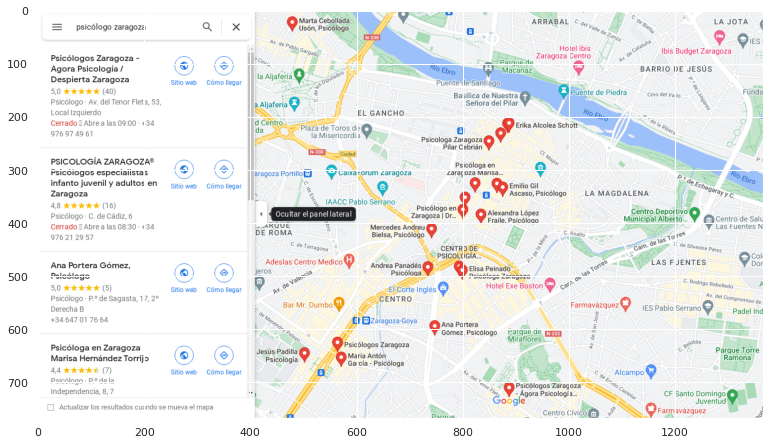

,Negocio,Dirección,Telefono,Web,Coordenadas,Categorias,NotaReviews,NumReviews,Resumen Reviews
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,"Av. del Tenor Fleta, 53, Local Izquierdo, 5000...",+34 976 97 49 61,agorapsicologia.es,"41.6502801,-0.8885286,15","[Psicólogo, Psicólogo infantil, Clínica de psi...",5.0,40,"[""Profesionalidad y buen trato."", ""Muy content..."
1,PSICOLOGÍA ZARAGOZA® Psicólogos especialistas ...,"C. de Cádiz, 6, 50004 Zaragoza, España",+34 976 21 29 57,psicologiazaragoza.es,"41.6502801,-0.8885286,15","[Psicólogo, Psicólogo infantil, Psicoterapeuta]",4.8,16,"[""Honestos, serios en su trabajo e implicados ..."
2,"Ana Portera Gómez, Psicólogo","P.º de Sagasta, 17, 2º Derecha B, 50008 Zarago...",+34 647 01 76 64,doctoralia.es,"41.6429506,-0.9022806,15","[Psicólogo, Psicólogo infantil]",5.0,5,[]
3,"Ana Portera Gómez, Psicólogo","P.º de Sagasta, 17, 2º Derecha B, 50008 Zarago...",+34 647 01 76 64,doctoralia.es,"41.6429506,-0.9022806,15","[Psicólogo, Psicólogo infantil]",5.0,5,[]
4,Martínez Bardají Psicología y Salud- Centro In...,"C. de Alfonso I, 28, 50003 Zaragoza, España",+34 976 90 14 48,psicologiaycoachingzaragoza.es,"41.6551928,-0.8963801,15",[Psicólogo],5.0,12,"[""Me ayudó un montón en momentos duros de mi v..."
5,CENTRO DE PSICOLOGÍA EXTREMERA SÁNCHEZ,"C. de San Ignacio de Loyola, 9, 1º F, 50008 Za...",+34 976 24 83 07,psicologoszaragoza.info,"41.6551928,-0.8963801,15",[Psicólogo],4.8,19,"[""Destaco de esta primera visita la cercanía y..."
6,"Mercedes Andreu Bielsa, Psicólogo","C. de Bilbao, 11, 1ºa, 50004 Zaragoza, España",+34 676 79 60 80,doctoralia.es,"41.6551928,-0.8963801,15",[Psicólogo],5.0,5,[]
7,Elisa Peinado Psicóloga Zaragoza,"C. de José María Lacarra de Miguel, 4, 50008 Z...",+34 667 61 14 50,psicologazaragoza.es,"41.6551928,-0.8963801,15",[Psicólogo],5.0,35,"[""Excelente profesional y atenta y cariñosa co..."


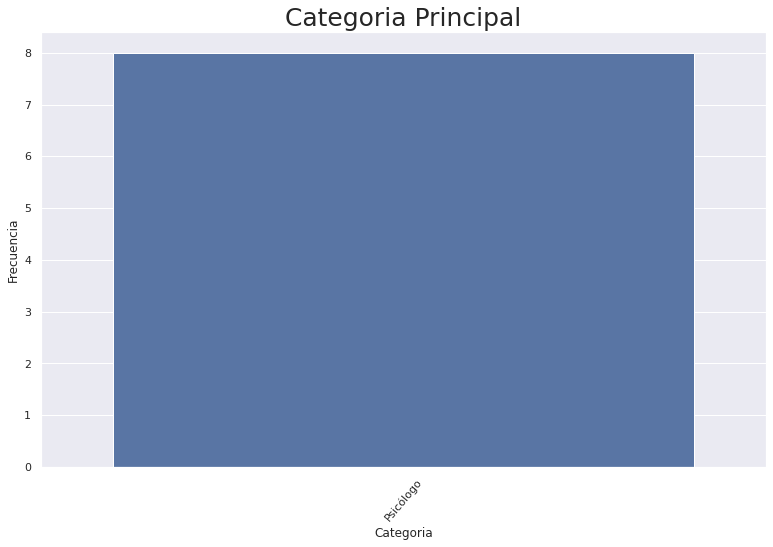




----------------------------------------------------------------------------------
Este colab está dedicado a Eva, mi dama del lago. Por ti me pasaría al lado oscuro
----------------------------------------------------------------------------------



----------------------------------------------------------------------------------
Gráfica de Quesos para Categoría + Subcategorías
----------------------------------------------------------------------------------


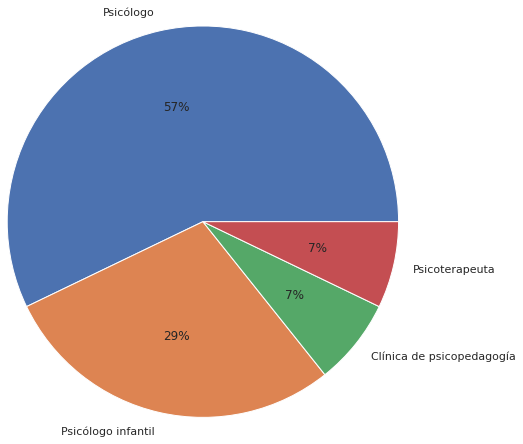

,Atributos del Servicio,Contador
0,Sanitario,8
1,Entrada con acceso para silla de ruedas,7
2,Se requiere una cita,3
3,Se identifica como mujer empresaria,2
4,Amigable con la comunidad LGBTQ+,2
5,Espacio seguro para personas transgénero,2


,Mencionado en Reseñas según Gooogle,Veces
7,trabajo,12
1,confianza,5
3,honesto,5
2,empatía,4
4,humano,4
0,carisma,3
5,sensibilidad,3
6,suerte,3


,Palabra,Tipo,Frecuencia
0,profesional,NOUN,19
1,ayudar,VERB,16
2,profesionales,NOUN,12
3,elisa,PROPN,10
4,trato,NOUN,9
...,...,...,...
471,pacientes,NOUN,1
472,resumen,NOUN,1
473,punto,NOUN,1
474,vista,NOUN,1


,Negocio,Novedades
4,Martínez Bardají Psicología y Salud- Centro In...,Hemos abierto un nuevo centro exclusivo para ...
7,Elisa Peinado Psicóloga Zaragoza,La vida no es el ideal que imaginábamos... \n\...
7,Elisa Peinado Psicóloga Zaragoza,"Defender la alegría, \nLa nuestra, no la impue..."
7,Elisa Peinado Psicóloga Zaragoza,"Hoy en día corremos detrás de la felicidad, co..."
7,Elisa Peinado Psicóloga Zaragoza,Por una educación que nos enseñe a pensar y no...
7,Elisa Peinado Psicóloga Zaragoza,"Siempre la vida es nuestra mejor maestra, a tr..."
7,Elisa Peinado Psicóloga Zaragoza,¡Seguimos disfrutando de la hermosa Noruega!\n...
7,Elisa Peinado Psicóloga Zaragoza,Noruega… \n¡Bellísima! Da igual hacia dónde mi...
7,Elisa Peinado Psicóloga Zaragoza,A lo largo de la vida vamos transitando divers...
7,Elisa Peinado Psicóloga Zaragoza,"¿Quieres algo? \nSi es así, muévete. Intenta s..."


,Negocio,Reseñas
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,"Son una gente estupenda, atenta, y atienden ta..."
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,Mi experiencia con los profesionales de Ágora ...
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,"Es un centro muy completo y acogedor , muy pro..."
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,"Totalmente recomendable, es muy importante pon..."
0,Psicólogos Zaragoza - Ágora Psicología / Despi...,"Decir gracias es poco , estamos encantados con..."
...,...,...
7,Elisa Peinado Psicóloga Zaragoza,Comencé a realizar supervisión con Elisa en Fe...
7,Elisa Peinado Psicóloga Zaragoza,Elisa me ha acompañado a través de mi proceso ...
7,Elisa Peinado Psicóloga Zaragoza,Tuve la suerte hace unos meses de comenzar ter...
7,Elisa Peinado Psicóloga Zaragoza,Elisa es una profesional que siempre ha sabido...


In [ ]:
#Cambia la keyword por lo que quieras
#HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
keyword= 'psicólogo Zaragoza' #por ejemplo: keyword = "consultor SEO zaragoza"
#HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH


url = "https://www.google.es/maps/search/%s/?hl=ar" % (keyword.replace(" ", "+").lower())

# Arreglado => Espero que google no vuelva a cambiar los selectores 😅
selectorDivSuperior = "Nv2PK"
selectorNegocio = "hfpxzc"
selectorReviews = "MyEned"

!pip install pyOpenSSL==22.0.0
!pip install selenium-wire

from seleniumwire import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
!apt update
!apt install chromium-chromedriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0")
options.add_argument("--window-size=1366,768")#360,851
wd = webdriver.Chrome(options=options)
#Me da pereza limpiar el código...

#Empezamos con google Maps
print("-----------------------")
print("Scrapeando negocios")
print("-----------------------")
wd.get(url)
time.sleep(1)
boton = wd.find_elements(by=By.CSS_SELECTOR, value="[value='Acepto']") #Aceptamos las condicciones de google? => Va a ser que si...
if len(boton) > 0:
  boton[0].click()
  time.sleep(0.5)

%rm -rf screenshot0.png
wd.save_screenshot("screenshot0.png") #Guardo un pantallazo de los resultados para mostrarlo después



from pprint import pprint

misQueridosNegocios = []

def devuelveNegocios():
  divSuperior = wd.find_elements(by=By.CLASS_NAME, value=selectorDivSuperior)
  
  if len(divSuperior) == 0:
    return []
  else:
    negociosX = [x.find_element(by=By.CLASS_NAME, value=selectorNegocio) for x in divSuperior if "ANUNCIO" not in x.text.upper() and x.find_element(by=By.CLASS_NAME, value=selectorNegocio) != None] 
    return(negociosX)

hola = devuelveNegocios()
print(len(hola))


# En caso de ser necesario haremos scroll para mostrar más resultados
def scrollPrincipal():
  scrollB = wd.find_elements(by=By.CLASS_NAME, value="section-scrollbox") #section-scrollbox ya no aparece => Tengo que arreglarlo cuando tenga tiempo
  num = 0
  if len(scrollB) == 0: return False
  if len(scrollB) >1: num = 1
  wd.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                    scrollB[num])
  time.sleep(1)


# Tras scrapear cada negocio tendremos que cerrarlo para volver a búsqueda principal en Maps
def cerrarNegocio():
    botonCerrar = wd.find_element(by=By.CSS_SELECTOR, value="[aria-label='Atrás']")
    botonCerrar.click()
    WebDriverWait(wd,  10).until(EC.presence_of_element_located((By.CLASS_NAME, selectorNegocio)))

negocios0 = devuelveNegocios() #recupero negocios

# Función principal para scrapear datos de cada negocio
def datosNegocio(i):
  negocios = devuelveNegocios()
  if len(negocios) < 10:
    scrollPrincipal()
  negocios = devuelveNegocios()
  
  if len(negocios)-1 < i:return False #cosas raras que pasan en maps 😉

  wd.execute_script("arguments[0].click();", negocios[i]) #la opción negocios[i].click() alguna ocasión me da error
  WebDriverWait(wd,  10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "[data-item-id='address']")))
  time.sleep(2)#por si las flies
  
  nombre = wd.find_elements(by=By.CSS_SELECTOR, value="h1")
  nombre = [n for n in nombre if n.text !=""]
  
  if len(nombre) == 0 or nombre[0].text == "" :
    print("Error scrapeando negocio")
    return False
  print("=> Scrapeando " + nombre[0].text) #Nombre del negocio que estamos scrapeando
  
  miRequest = ""
  # Aprovecho las listas que google usa por debajo y me evito escrapear...
  for request in wd.requests: 
    if request.response:
      if request.url.startswith("https://www.google.es/maps/preview/place?authuser=0"):
        miRequest = request

  resp = miRequest.response.body
  parsear = resp.decode("utf-8").replace(")]}'", "")
  import json
  datos = json.loads(parsear)

  # Recupero datos del negocio  
  negocio = []

  negocio.append(datos[6][11]) #nombre
  negocio.append(datos[6][39]) #dirección
  negocio.append(datos[6][178][0][0]) #teléfono
  negocio.append(datos[6][7][1]) #web
  urlNegocio =  wd.current_url #Las coordenadas del negocio están en la url
  negocio.append(urlNegocio.split("@")[1].split("z/")[0]) #coordenadas
  negocio.append(datos[6][13]) # categoria y subcategorías
    
  try:
    misAtributos = []
    atributos = datos[6][100][1]
    atributos = [x[2] for x in atributos]
        
    atributos = [[y[1]  for y in x] for x in atributos] #[y[1], y[2][1][0][0] ] Se podría especificar si el atributo es True o False...

    for x in atributos:
        misAtributos = misAtributos + x
    negocio.append(misAtributos)
  except:
    #No me lo curro mucho, si no está que falle...
    negocio.append([])
  


  negocio.append(datos[6][4][7]) #nota reseñas
  negocio.append(datos[6][4][8]) #numero reviews
  #datos[6][34][1] #de aquí podría sacar el horario

  try:
    mencionado = datos[6][153][0] #mencionado en reseñas según google
    mencionado = [[x[1], x[3][-1]] for x in mencionado] 
    negocio.append(mencionado)
  except:
    negocio.append([])
  
  try:
    resumen = datos[6][31][1] #resumen reseñas
    resumen = [x[1] for x in resumen]
    negocio.append(resumen)
    #reviews = datos[6][52][0] # De aquí podría sacar las reseñas principales, lista unas 10, pero quiero más...
  except:
    negocio.append([])

  try:
    publicaciones = [] # últimas publicaciones del negocio
    for x in datos[6][122][1]:
      h = x[1][0]
      texto = ""
      for elem in h:
        trozo = elem[0]
        if trozo.startswith("#"):trozo = elem[3]
        texto = texto + trozo
      if texto.strip() != "": publicaciones.append(texto)
    negocio.append(publicaciones)
  except:
      negocio.append([])
  
  # Vamos por las reviews
  botonReviews = wd.find_elements(by=By.CSS_SELECTOR, value="button[jsaction='pane.rating.moreReviews']")
  if len(botonReviews) > 0:
    botonReviews[0].click()
    WebDriverWait(wd,  10).until(EC.presence_of_element_located((By.CLASS_NAME, selectorReviews)))
    time.sleep(2)
    
    reviews = wd.find_elements(by=By.CLASS_NAME, value=selectorReviews)
    numReviews = negocio[8]
    
    reviewEnPantalla= wd.find_elements(by=By.CLASS_NAME, value=selectorReviews)
   
    numMaxReviews = 50 #No quiero más de 50, tardaría demasiado
    if numReviews < numMaxReviews: numMaxReviews = numReviews
    reviewsTodas = []
    numReviews = negocio[8]
    
    #reviewEnPantalla= wd.find_elements(by=By.CLASS_NAME, value=selectorReviews)


    """
    # Tengo que arreglar el tema de scroll de reviews cuando tenga tiempo
    scrollB = reviewEnPantalla[-1]
    

    # Hago scroll par recuperar más reviews
    maximo = (numMaxReviews-len(reviewEnPantalla))/10 + 5
    contador = 1
    while len(reviewEnPantalla) < numMaxReviews :
      wd.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                    scrollB)
      time.sleep(0.3)
      reviewEnPantalla= wd.find_elements(by=By.CLASS_NAME, value=selectorReviews)
      if contador >= maximo:break
      contador = contador + 1
    """
    reviewEnPantalla= wd.find_elements(by=By.CLASS_NAME, value=selectorReviews)
    

    reviewEnPantalla = [x.text.strip() for x in reviewEnPantalla if x.text.strip() != ""]
    
    negocio.append(reviewEnPantalla)
    #cerramos las reviews
    botonCerrar = wd.find_element(by=By.CLASS_NAME, value="VfPpkd-icon-LgbsSe")
    botonCerrar.click()
    WebDriverWait(wd,  10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "[data-value='Cercano']")))
    nombre = wd.find_element(by=By.CSS_SELECTOR, value="h1").text
    
  else:
    negocio.append([])  
  
  # Volvemos a la búsqueda general
  #cerrarNegocio()  #tras cambios de google no parece necesario
  # Añadimos el negocio a la lista de negocios
  misQueridosNegocios.append(negocio)

# bucle para recuperar negocios
for i in range(0, len(negocios0)): #3
  try:
    datosNegocio(i)

  except Exception as e: 
    print(str(e))

  # recupero los elementos html con link a negocios que no sean anuncios
  negocios = devuelveNegocios()
  if len(negocios)==0:
    cerrarNegocio()

print(str(len(misQueridosNegocios)) + " Negocios scrapeados")

if len(misQueridosNegocios) == 0:
  print("sorry no se ha scrapeado ningún negocio")
  %kill -9 -1

# Empezamos la parte de mostrar resultados
# Creo dataframe y tabla con datos de los negocios
import pandas as pd
negociosDF = pd.DataFrame (misQueridosNegocios, columns = ['Negocio', 'Dirección', 'Telefono', 'Web', 'Coordenadas', 'Categorias', 'Atributos', 'NotaReviews', 'NumReviews', 'Menciona', 'Resumen Reviews', 'Novedades', 'Reseñas' ])

# Dependencias que necesito
!pip install spacy
!python -m spacy download es_core_news_sm
import es_core_news_sm
nlp = es_core_news_sm.load()
import spacy
from spacy.matcher import Matcher
import re
from unicodedata import normalize

# Muestro imagen de resultados en MAPs => como referencia
import matplotlib.image as mpimg

try:
  img = mpimg.imread('screenshot0.png')
  imgplot = plt.imshow(img)
  plt.show()
except:
  print("Ups no he podido cargar la imágen")

# funciones para crear tablas a partir de dataframe / lista
from google.colab import data_table
def pasarDFATabla(dataframe0, Nlineas=20):
  tabla = data_table.DataTable(dataframe0, include_index=False, num_rows_per_page=Nlineas)
  display(tabla)

def pasarATabla(lista,columnas):
  lista = pd.DataFrame (lista, columns = columnas )
  lista = data_table.DataTable(lista, include_index=True, num_rows_per_page=20)
  display(lista)

# Muestro tabla con resumen de datos
datosPrincipales = negociosDF[["Negocio", "Dirección" , 'Telefono', 'Web', 'Coordenadas', 'Categorias', 'NotaReviews', 'NumReviews', 'Resumen Reviews']]

pasarDFATabla(datosPrincipales)

def rotulos(rotulo):
  print("\n\n")
  print("----------------------------------------------------------------------------------")
  print(rotulo)
  print("----------------------------------------------------------------------------------")

#gráfica de categorias más usadas
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def graficaContador(lista, titulo, columnas):
  lista = Counter(lista).most_common()
  sns.set_theme(style="darkgrid")
  top_df = pd.DataFrame(lista)
  top_df.columns=columnas
  sns.set(rc={'figure.figsize':(13,8)})
  g = sns.barplot(x=columnas[0], y=columnas[1], data=top_df)
  g.axes.set_title(titulo,fontsize=25)
  g.set_xticklabels(g.get_xticklabels(), rotation=50)
  plt.show()

#Gráfica contador de categoria Principal
categoriasPrincipales = [x[0] for x in negociosDF["Categorias"]]
graficaContador(categoriasPrincipales, "Categoria Principal", ["Categoria", "Frecuencia"])


rotulos("Este colab está dedicado a Eva, mi dama del lago. Por ti me pasaría al lado oscuro")

#Contador de catetorías + subcategorías
categorias = negociosDF['Categorias'].sum()
categorias = Counter(categorias).most_common()

rotulos("Gráfica de Quesos para Categoría + Subcategorías")
if len(categorias) > 1:
  pie, ax = plt.subplots(figsize=[10,6])
  plt.pie([x[1] for x in categorias], labels = [x[0] for x in categorias],  autopct='%.0f%%', radius=1.5)
else:
  print("No existen subcategorías")

plt.show()

#Muestro tabla con atributos del servicio
atributos = negociosDF['Atributos'].sum()
atributos = Counter(atributos).most_common()
pasarATabla(atributos, ["Atributos del Servicio", "Contador"])

#Tabla con Mencionado en reseñas
menciona = negociosDF['Menciona'].explode()
menciona = menciona[(menciona.isna() == False)]
menciona = pd.DataFrame(menciona.tolist(), columns= ["Mencionado en Reseñas según Gooogle", "Veces"])
menciona = menciona.groupby(by="Mencionado en Reseñas según Gooogle").sum().reset_index().sort_values(by="Veces", ascending=False)
pasarDFATabla(menciona)

# Recupero adjetivos, sustantivos verbos... más usados en reseñas

# Me creo una función para recuperar tabla de adjetivos, verbos...
def adjetivosNombreVerbos(lista):

  #quito acentos para igualar las faltas
  def quitarAcentos(frase):
    frase = re.sub(
          r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
          normalize( "NFD", frase), 0, re.I
      )
    frase = normalize( 'NFC', frase)
    return frase

  # Limpio el texto antes de procesarlo 
  def limpiarTexto(texto):
    texto = re.sub(r'\s+', ' ', texto)
    texto = re.sub(r'\n+', ' ', texto)
    texto = re.sub(r'\t+', ' ', texto)
    texto = re.sub(r'http\S+', '', texto)
    texto = re.sub('[^a-zA-ZÀ-ÿ\u00f1\u00d1,.¿?¡!]', ' ', texto)
    return texto.strip()

  lista = [limpiarTexto(x) for x in lista]

  # Para verbos me interesa lematizar => el infinitivo (comer, reservar...)
  def lemmaOTexto(token):
    if token.pos_ == "VERB":
      return quitarAcentos(token.lemma_)
    else:
      return quitarAcentos(token.text)

  # me quitaré morralla
  misTokens = []
  evitar = {"DET", "CONJ", "CCONJ", "ADP", "ADV", "AUX", "PRON", "INTJ", "PUNCT", "SCONJ", "SYM", "SPACE"}

  # uso spacy para recuperar posición sintática
  for doc in nlp.pipe(lista):
    soloPalabras = [lemmaOTexto(token).lower() + "__" + token.pos_
      for token in doc
          if not token.is_stop and not token.is_punct and token.pos_ not in evitar]
    misTokens = misTokens + soloPalabras

  word_freq = Counter(misTokens)
  common_words = word_freq.most_common()

  words3 = [[x[0].split("__")[0], x[0].split("__")[1],  x[1] ] for x in list(common_words)]

  #agrupo duplicados que caigan en otra categoría
  wordsAgrupadas = []
  for palabra in words3:
    if palabra[0] in [x[0] for x in wordsAgrupadas]: continue
    espejo = filter(lambda item: item[0] == palabra[0], words3)
    num = sum([x[2] for x in espejo])
    wordsAgrupadas.append([palabra[0], palabra[1], num])

  #reordeno
  wordsAgrupadas.sort(key=lambda x: x[2], reverse=True)

  pasarATabla(wordsAgrupadas, ["Palabra", "Tipo", "Frecuencia"])

#Analizo Reseñas
reviewsTodasX = list(negociosDF["Reseñas"].explode())
adjetivosNombreVerbos(reviewsTodasX)

#tabla con últimas novedades => si el sector lo permite/si se publican, o incluso si google las considera relevantes y las quiere recuperar/mostrar
publicaciones = negociosDF[['Negocio','Novedades']].explode(column="Novedades")
publicaciones = publicaciones[publicaciones["Novedades"].isna() == False] 

pasarDFATabla(publicaciones)

#tabla con hasta 50 reseñas por negocio
reviews = negociosDF[['Negocio','Reseñas']].explode(column="Reseñas")
reviews = reviews[reviews["Reseñas"].isna() == False] 

pasarDFATabla(reviews)

#cerramos el chiringuito
wd.quit()